# Проект: Статистический анализ данных

В основе исследования данные о некоторых пользователях сервиса аренды самаккатов GoFast. Выборка содержит информацию о пользовотелях из нескольких городов, а так же об их поездках .


Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
* без подписки
> * абонентская плата отсутствует;
> * стоимость одной минуты поездки — 8 рублей;
> * стоимость старта (начала поездки) — 50 рублей;
* с подпиской Ultra
> * абонентская плата — 199 рублей в месяц;
> * стоимость одной минуты поездки — 6 рублей;
> * стоимость старта — бесплатно.

**Цель** - проанализиривать данные и проверить гипотезы, которые могут помочь бизнесу вырасти.

**План работы**
1. [Загрузка данных](#scrollTo=c42cbe00)
1. [Провести предобработку данных](#scrollTo=e95ebca7&line=1&uniqifier=1)
2. [Исследовательский анализ данных](#scrollTo=212593c7)
3. [Объединить данные и создать новые датафреймы](#scrollTo=4ef51331)
4. [Провести подсчет выручки](#scrollTo=402d620f)
5. [Проверить гипотизы](Q#scrollTo=41545ac0)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

#### Шаг 1. Загрузка данных

In [ ]:
df_users = pd.read_csv('/content/users_go (1).csv')
df_users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


Описание данных для df_users
* user_id - уникальный идентификатор пользователя
* name - имя пользователя
* age - возраст
* city - город
* subscription_type - тип подписки (free, ultra)

In [ ]:
df_rides = pd.read_csv('/content/rides_go (1).csv', parse_dates=['date'])
df_rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


Описание данных для df_rides
* user_id - уникальный идентификатор пользователя
* distance - расстояние, которое пользователь проехал в текущей сессии (в метрах)
* duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
* date - дата совершения поездки

In [ ]:
df_sub = pd.read_csv('/content/subscriptions_go.csv')
df_sub.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Описание данных для df_sub
* subscription_type - тип подписки
* minute_price - стоимость одной минуты поездки по данной подписке
* start_ride_price - стоимость начала поездки
* subscription_fee - стоимость ежемесячного платежа

##### Общая информация о каждом датафрейме.

In [ ]:
print("DataFrame df_users: ")
df_users.info()

print("\nDataFrame df_rides: ")
df_rides.info()

print("\nDataFrame df_sub: ")
df_sub.info()

DataFrame df_users: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB

DataFrame df_rides: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB

DataFrame df_su

**Вывод:**
1. Пропусков не обнаружено.
2. Возможно имеются дубликаты строк, что следует проверить.

#### Шаг 2. Предобработка данных

**Создам новый столбец с номером месяца на основе столбца date.**

In [ ]:
df_rides['month_number'] = df_rides['date'].dt.month
df_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       18068 non-null  int64         
 1   distance      18068 non-null  float64       
 2   duration      18068 non-null  float64       
 3   date          18068 non-null  datetime64[ns]
 4   month_number  18068 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1)
memory usage: 635.3 KB


In [ ]:
df_rides.head()

,user_id,distance,duration,date,month_number
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


**Проверка на дубликаты**

In [ ]:
def duplicates_df(df,name):
    duplicates = df[df.duplicated()]
    if not duplicates.empty:
        print(f'Обнаружены явные дубликаты для {name}:')
        print(duplicates)
    else:
        print(f"Явных дубликатов для {name} не обнаружено.")

In [ ]:
print(duplicates_df(df_users,'df_users'))
print(duplicates_df(df_rides,'df_rides'))

Обнаружены явные дубликаты для df_users:
      user_id        name  age            city subscription_type
1534      293       Агата   26       Краснодар             ultra
1535       16      Амалия   27       Краснодар             ultra
1536      909  Константин   20    Екатеринбург              free
1537      403      Полина   19            Сочи             ultra
1538      908      Рустам   30          Тюмень              free
1539       43    Стефания   22            Омск             ultra
1540      127       Павел   25       Пятигорск             ultra
1541      659       Злата   27  Ростов-на-Дону             ultra
1542      204      Руслан   30       Пятигорск             ultra
1543      153      Герман   23          Москва             ultra
1544     1245      Регина   27       Пятигорск              free
1545      807   Александр   28    Екатеринбург              free
1546      924       Мария   23       Пятигорск              free
1547      635      Герман   21          Москва   

Удалим дубликаты для df_users

In [ ]:
df_users.drop_duplicates()
print(duplicates_df(df_users,'df_users'))
df_users.info()

Обнаружены явные дубликаты для df_users:
      user_id        name  age            city subscription_type
1534      293       Агата   26       Краснодар             ultra
1535       16      Амалия   27       Краснодар             ultra
1536      909  Константин   20    Екатеринбург              free
1537      403      Полина   19            Сочи             ultra
1538      908      Рустам   30          Тюмень              free
1539       43    Стефания   22            Омск             ultra
1540      127       Павел   25       Пятигорск             ultra
1541      659       Злата   27  Ростов-на-Дону             ultra
1542      204      Руслан   30       Пятигорск             ultra
1543      153      Герман   23          Москва             ultra
1544     1245      Регина   27       Пятигорск              free
1545      807   Александр   28    Екатеринбург              free
1546      924       Мария   23       Пятигорск              free
1547      635      Герман   21          Москва   

**Вывод:**
1. Был изменен тип данных в столбце date на datetime64
2. Были проверены датафреймы на наличие дубликатов, в датафрейме df_users были удалены строки с дубликатами. Явных дубликатов для df_rides обнаружено не было.

In [ ]:
df_rides['distance'] = df_rides['distance'].round()
df_rides['distance']

,distance
0,4410.0
1,2618.0
2,754.0
3,2695.0
4,4029.0
...,...
18063,3781.0
18064,2840.0
18065,3826.0
18066,2902.0


In [ ]:
start_df = df_rides['date'].min()
end_df = df_rides['date'].max()

print("Первый день:", start_df)
print("Последний день:", end_df)

Первый день: 2021-01-01 00:00:00
Последний день: 2021-12-30 00:00:00


In [ ]:
df_rides['duration'].describe()

,duration
count,18068.000000
mean,17.805011
std,6.091051
min,0.500000
25%,13.597563
50%,17.678395
75%,21.724800
max,40.823963


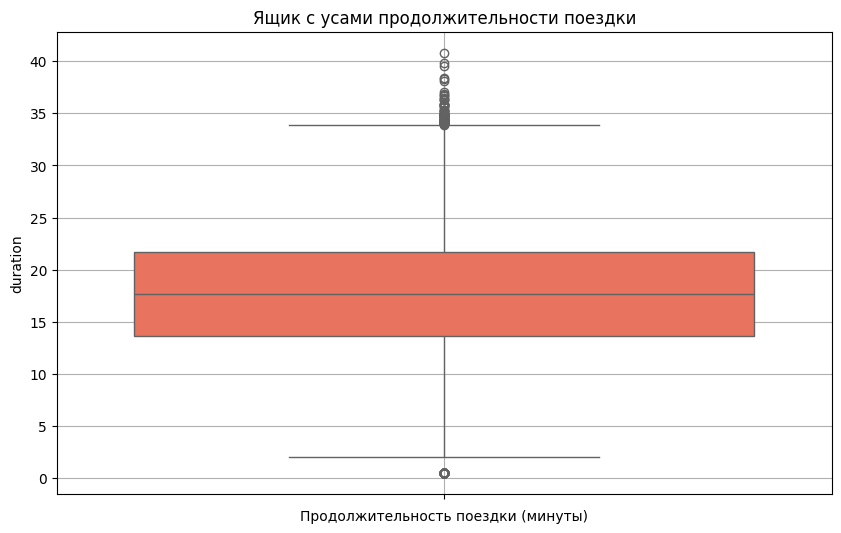

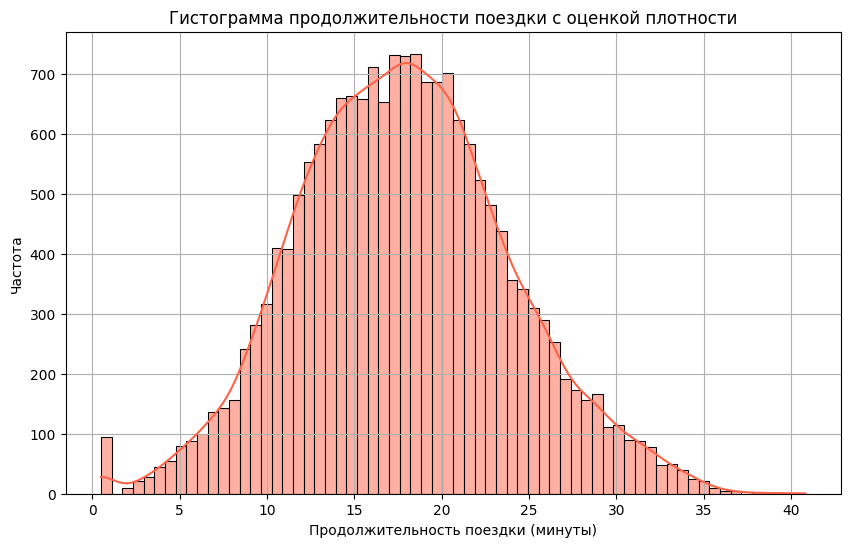

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(df_rides['duration'], color='#FF6347')
plt.title('Ящик с усами продолжительности поездки')
plt.xlabel('Продолжительность поездки (минуты)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df_rides['duration'], kde=True, color='#FF6347', edgecolor='black')
plt.title('Гистограмма продолжительности поездки с оценкой плотности')
plt.xlabel('Продолжительность поездки (минуты)')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

**Вывод:**
В результате оценки аномалий в столбце 'duration' были найдены незначительные выбросы (около 100 значений) в диапазоне от 0.5 до 1.
Период данных в датафрейме составил 2021 год с 1 января по 30 декабря

#### Шаг 3. Исследовательский анализ данных

**Описание и визуализация общей информации о пользователях и поездках**

##### Частота встречаемости городов

In [ ]:
df_users['city'].head(5)

,city
0,Тюмень
1,Омск
2,Москва
3,Ростов-на-Дону
4,Омск


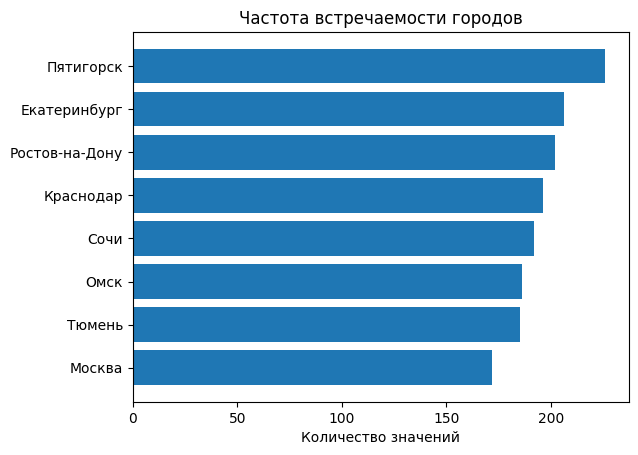

In [ ]:
city_counts = df_users['city'].value_counts()
city_counts_sorted = city_counts.sort_values()

plt.barh(city_counts_sorted.index, city_counts_sorted.values)
plt.xlabel('Количество значений')
plt.title('Частота встречаемости городов')
plt.show()

In [ ]:
city_counts

,count
city,
Пятигорск,226
Екатеринбург,206
Ростов-на-Дону,202
Краснодар,196
Сочи,192
Омск,186
Тюмень,185
Москва,172


**Вывод:**

Всего в данных представлены 8 городов. Чаще всего упоминается Пятигорск, реже всего - Москва. Необычно, что столица России в выборке представлена наименее часто, возможно, это связано с тем, что сервис лучше покрывает город Пятигорск и Екатеринбург, или наличием большего количества конкурентов в столице, а также может быть связано с развитием инфраструктуры или иметь другие причины, например, особенности выбранных данных.

##### Соотношение пользователей с подпиской и без подписки

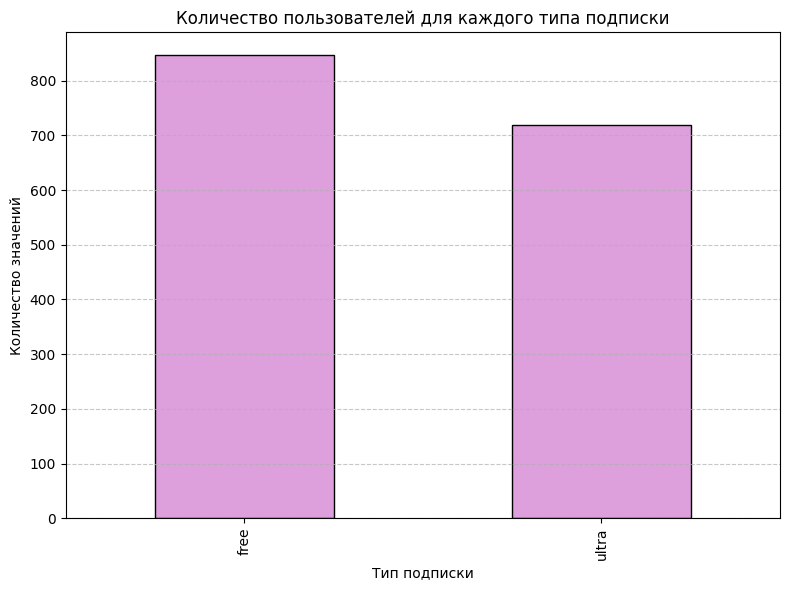

In [ ]:
subscription_counts = df_users['subscription_type'].value_counts()

plt.figure(figsize=(8, 6))
subscription_counts.plot(kind='bar', color='#DDA0DD', edgecolor='black')
plt.title('Количество пользователей для каждого типа подписки')
plt.xlabel('Тип подписки')
plt.ylabel('Количество значений')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

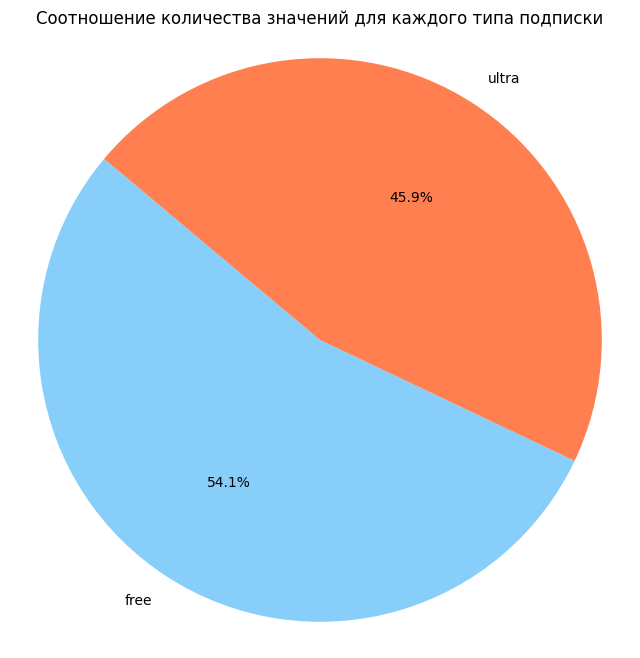

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(subscription_counts, labels=subscription_counts.index, autopct='%1.1f%%', startangle=140,colors=['#87CEFA','#FF7F50'])
plt.title('Соотношение количества значений для каждого типа подписки')
plt.axis('equal')
plt.show()

**Вывод:**
Количество пользователей без подписки немного больше, чем пользователей с подпиской. Разница составляет примерно 8.8%.

##### Возрост пользователей

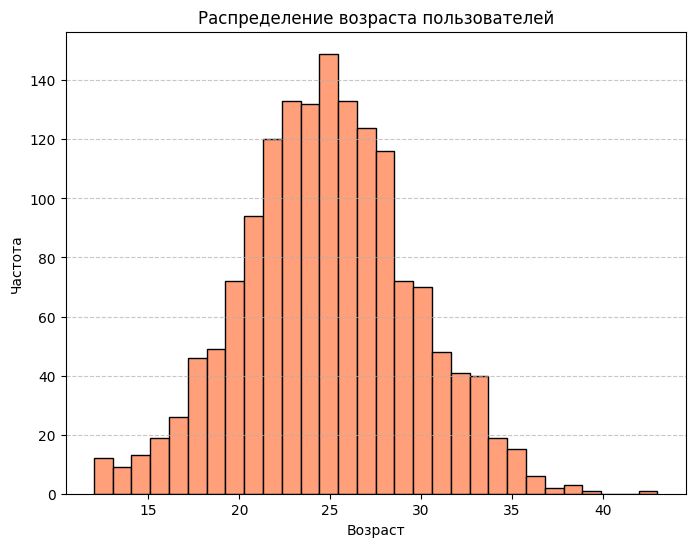

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df_users['age'], bins=30, color='#FFA07A', edgecolor='black')
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Добавление сетки
plt.show()

In [ ]:
df_users['age'].describe()

,age
count,1565.000000
mean,24.922045
std,4.553496
min,12.000000
25%,22.000000
50%,25.000000
75%,28.000000
max,43.000000


**Вывод:**
    
Распределение возраста пользователей сервиса представлено на гистограмме. Видно, что распределение имеет вид нормальной кривой со средним возрастом в районе 25 лет, а так же семетрично относительно среднего. Наиболее часто встречающийся возраст - 25 лет, при этом средний возраст составляет 24.9 лет. Большинство пользователей находятся в возрастном диапазоне от 20 до 30 лет, хотя есть и небольшое количество пользователей старше 30 лет. Обнаружены выбросы в возрастной группе от 12 до 18 лет, вероятно, связанные с наличием несовершеннолетних пользователей. Распределение возраста в выборке выглядит стандартным  и подтверждает ожидаемые демографические характеристики аудитории.

##### Расстояние, которое пользователь преодолел за одну поездку

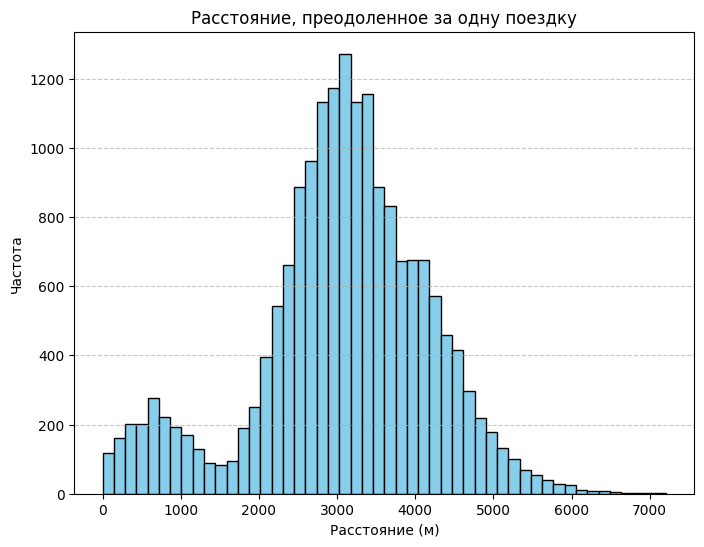

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df_rides['distance'], bins=50, color='skyblue', edgecolor='black')
plt.title('Расстояние, преодоленное за одну поездку')
plt.xlabel('Расстояние (м)')
plt.ylabel('Частота')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Добавление сетки
plt.show()

In [ ]:
df_rides['distance'].describe()

,distance
count,18068.000000
mean,3070.659010
std,1116.832209
min,1.000000
25%,2543.000000
50%,3134.000000
75%,3776.000000
max,7211.000000


**Вывод:**
Расстояние, которое пользователи преодолевают за одну поездку, имеет наибольшую плотность вокруг 3000 метров. Однако существует небольшой пик в районе 500 метров, что может указывать на наличие коротких маршрутов в области общественного транспорта, места работы, дома или другим причинам.

##### Продолжительность поездок

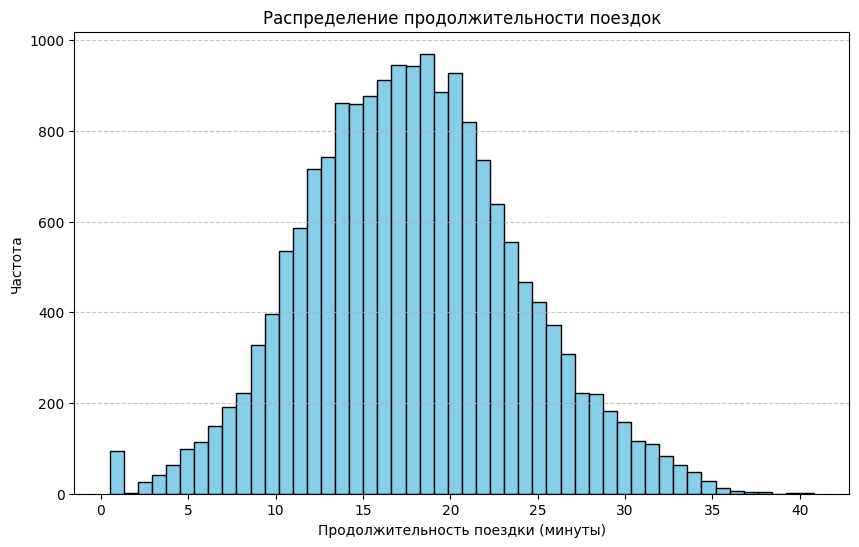

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_rides['duration'], bins=50, color='skyblue', edgecolor='black')
plt.title('Распределение продолжительности поездок')
plt.xlabel('Продолжительность поездки (минуты)')
plt.ylabel('Частота')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Добавление сетки
plt.show()

In [ ]:
df_rides['duration'].describe()

,duration
count,18068.000000
mean,17.805011
std,6.091051
min,0.500000
25%,13.597563
50%,17.678395
75%,21.724800
max,40.823963


Поездки меньше минуты выгледят как аномалии, следует убрать выбивающиеся значения из выборки

In [ ]:
p1_01 = df_rides['duration'].quantile(0.01)
df_rides = df_rides.query('duration >= @p1_01')

In [ ]:
df_rides['duration'].describe()

,duration
count,17887.000000
mean,17.967426
std,5.901186
min,3.991163
25%,13.731044
50%,17.746024
75%,21.765916
max,40.823963


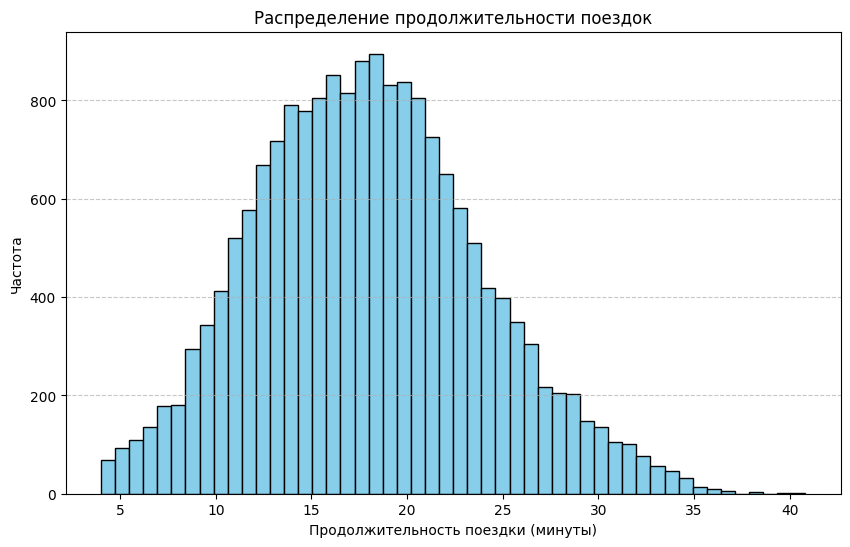

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_rides['duration'], bins=50, color='skyblue', edgecolor='black')
plt.title('Распределение продолжительности поездок')
plt.xlabel('Продолжительность поездки (минуты)')
plt.ylabel('Частота')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Добавление сетки
plt.show()

**Вывод:**


Среднее время поездки составляет около 18 минут, причем наиболее часто встречающееся время также находится в диапазоне 17-18 минут. Большинство поездок (около 50%) длится от примерно 13 до 21 минут, с минимальным временем в 3.99 минуты и максимальным - в 40.82 минут. Распределение времени поездки отражает средний характер поездок, хотя имеются как короткие, так и более продолжительные поездки.         

##### Вывод

* Среднее время поездки составляет около 18 минут, с наиболее частым временем в диапазоне 17-18 минут.
* Распределение возраста пользователей показывает типичный профиль с пиком в районе 25 лет.
* Количество пользователей без подписки немного превышает количество пользователей с подпиской (примерно на 8.8%).
* Среди городов, представленных в данных, наиболее часто упоминается Пятигорск, в то время как Москва упоминается реже всего. Необычно, что столица России встречается наименее часто, возможно, из-за особенностей покрытия сервиса или различий в инфраструктуре.
* Обнаруженые выбросы в данных о времени поездок, были удалены.


#### Шаг 4. Объединение данных

##### Объеденение данных о пользователях, поездках и подписках в один датафрейм.

In [ ]:
print('Размерность датафрейма df_users', df_users.shape)
print('Размерность датафрейма  df_rides', df_rides.shape)

Размерность датафрейма df_users (1565, 5)
Размерность датафрейма  df_rides (17887, 5)


In [ ]:
print(df_users['user_id'].nunique())
print(df_rides['user_id'].nunique())

1534
1534


In [ ]:
df_combined = pd.merge(df_users, df_rides, on='user_id')
df_combined.head(10)

,user_id,name,age,city,subscription_type,distance,duration,date,month_number
0,1,Кира,22,Тюмень,ultra,4410.0,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2618.0,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754.0,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2695.0,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4029.0,26.265803,2021-08-28,8
5,1,Кира,22,Тюмень,ultra,2771.0,16.650138,2021-10-09,10
6,1,Кира,22,Тюмень,ultra,3039.0,14.927879,2021-10-19,10
7,1,Кира,22,Тюмень,ultra,2842.0,23.117468,2021-11-06,11
8,1,Кира,22,Тюмень,ultra,3413.0,15.238072,2021-11-14,11
9,1,Кира,22,Тюмень,ultra,749.0,15.041884,2021-11-22,11


In [ ]:
print('Размерность датафрейма df_combined', df_combined.shape)

Размерность датафрейма df_combined (18204, 9)


In [ ]:
df_combined = pd.merge(df_combined, df_sub, on='subscription_type')

In [ ]:
pd.set_option('display.max_columns', None)
df_combined.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month_number,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4410.0,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2618.0,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.0,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2695.0,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4029.0,26.265803,2021-08-28,8,6,0,199


In [ ]:
df_combined.isna().sum()

,0
user_id,0
name,0
age,0
city,0
subscription_type,0
distance,0
duration,0
date,0
month_number,0
minute_price,0


In [ ]:
df_combined = df_combined.drop_duplicates()

In [ ]:
df_combined.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month_number,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4410.0,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2618.0,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.0,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2695.0,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4029.0,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
17882,1534,Альберт,25,Краснодар,free,3781.0,19.822962,2021-11-04,11,8,50,0
17883,1534,Альберт,25,Краснодар,free,2840.0,21.409799,2021-11-16,11,8,50,0
17884,1534,Альберт,25,Краснодар,free,3826.0,18.435051,2021-11-18,11,8,50,0
17885,1534,Альберт,25,Краснодар,free,2902.0,16.674362,2021-11-27,11,8,50,0


In [ ]:
print('Размерность датафрейма df_combined', df_combined.shape)

Размерность датафрейма df_combined (17887, 12)


In [ ]:
df_combined.isna().sum()

,0
user_id,0
name,0
age,0
city,0
subscription_type,0
distance,0
duration,0
date,0
month_number,0
minute_price,0


##### Создание датафрейма с данными о пользователях с подпиской и без

In [ ]:
df_free_sub = df_combined[df_combined['subscription_type'] == 'free']
df_ultra_sub = df_combined[df_combined['subscription_type'] == 'ultra']

df_free_sub.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11388 entries, 6499 to 17886
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11388 non-null  int64         
 1   name               11388 non-null  object        
 2   age                11388 non-null  int64         
 3   city               11388 non-null  object        
 4   subscription_type  11388 non-null  object        
 5   distance           11388 non-null  float64       
 6   duration           11388 non-null  float64       
 7   date               11388 non-null  datetime64[ns]
 8   month_number       11388 non-null  int32         
 9   minute_price       11388 non-null  int64         
 10  start_ride_price   11388 non-null  int64         
 11  subscription_fee   11388 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(3)
memory usage: 1.1+ MB


In [ ]:
df_ultra_sub.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6499 entries, 0 to 6498
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6499 non-null   int64         
 1   name               6499 non-null   object        
 2   age                6499 non-null   int64         
 3   city               6499 non-null   object        
 4   subscription_type  6499 non-null   object        
 5   distance           6499 non-null   float64       
 6   duration           6499 non-null   float64       
 7   date               6499 non-null   datetime64[ns]
 8   month_number       6499 non-null   int32         
 9   minute_price       6499 non-null   int64         
 10  start_ride_price   6499 non-null   int64         
 11  subscription_fee   6499 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(3)
memory usage: 634.7+ KB


##### Визуализация информации о расстоянии и времени поездок для пользователей обеих категорий.

Text(0.5, 1.0, 'Временя для каждой поездки пользователей с подпиской и без нее')

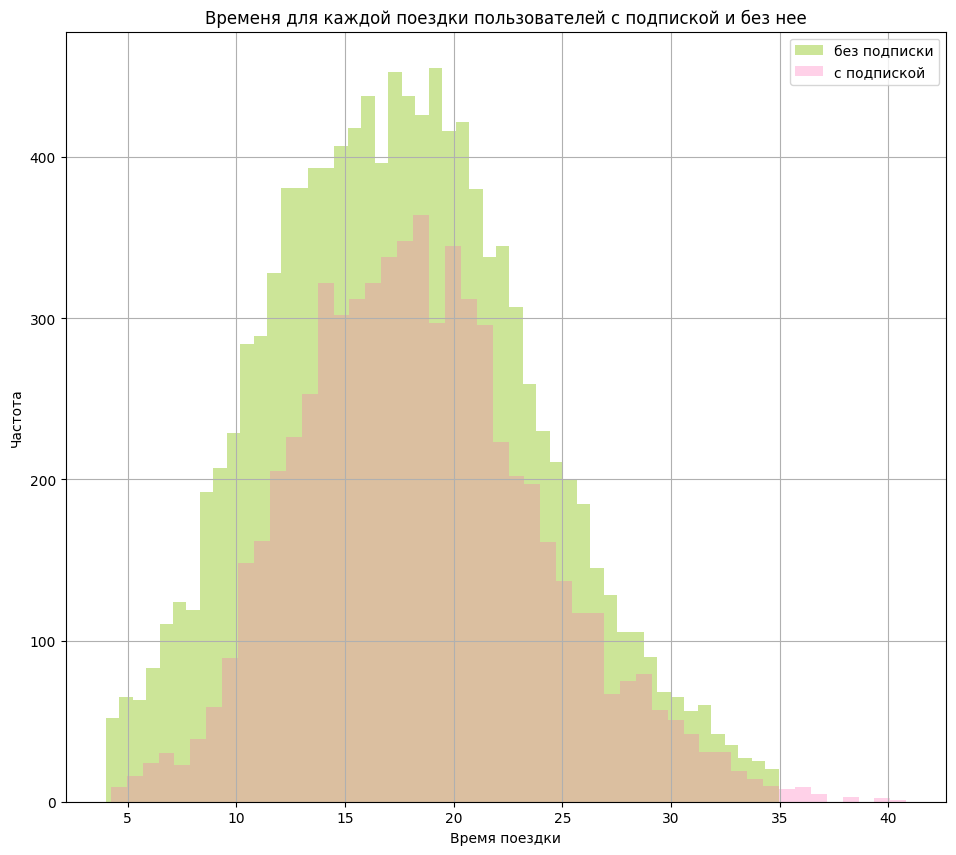

In [ ]:

plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
plt.hist(df_free_sub['duration'], bins=50, alpha=0.5, label='без подписки',color='#9ACD32')
plt.hist(df_ultra_sub['duration'], bins=50, alpha=0.3 , label='с подпиской',color='#FF69B4')
plt.xlabel('Время поездки')
plt.ylabel('Частота')
plt.legend()
plt.grid(True)
plt.title('Временя для каждой поездки пользователей с подпиской и без нее')

Text(0.5, 1.0, 'Расстояние для каждой поездки пользователей с подпиской и без нее ')

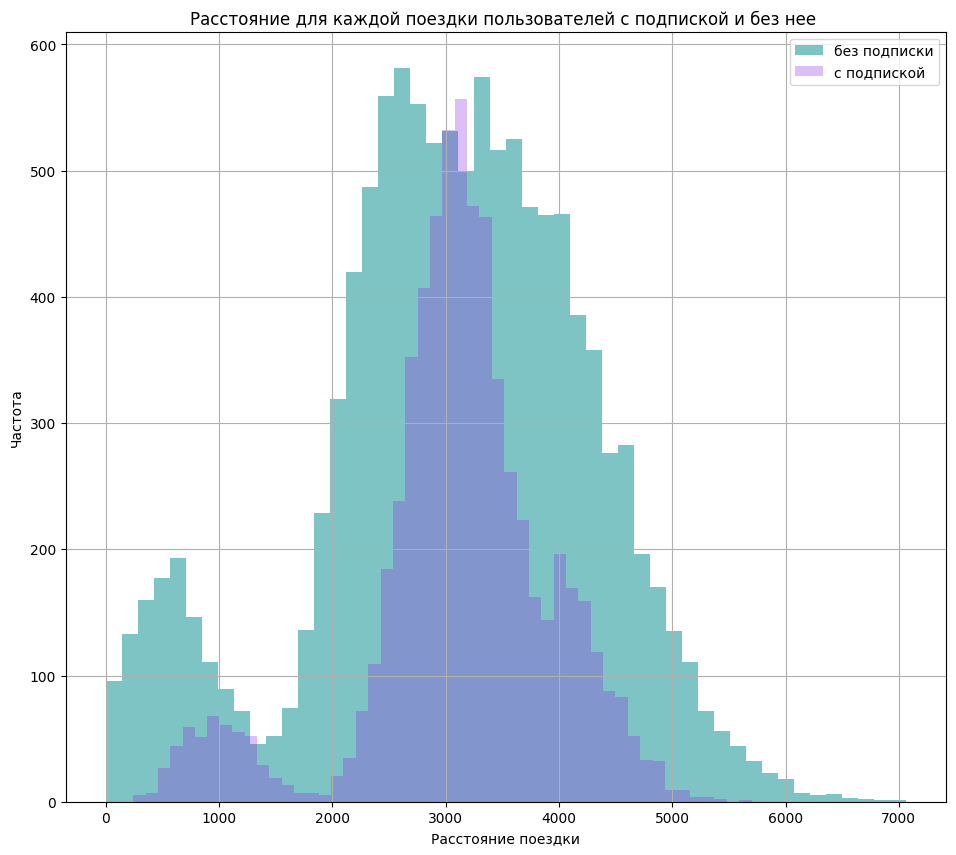

In [ ]:
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
plt.hist(df_free_sub['distance'], bins=50, alpha=0.5, label='без подписки',color='#008B8B')  # Распределение времени для первого датафрейма
plt.hist(df_ultra_sub['distance'], bins=50, alpha=0.3 , label='с подпиской',color='#8A2BE2')  # Распределение времени для второго датафрейма
plt.xlabel('Расстояние поездки')
plt.ylabel('Частота')
plt.legend()
plt.grid(True)
plt.title('Расстояние для каждой поездки пользователей с подпиской и без нее ')

**Вывод:**

1. Распределение времени поездки для пользователей с подпиской и без нее похоже: они имеют примерно одинаковый тренд.
2. Распределение расстояния поездки для обеих категорий пользователей отличается незначительно. Однако для пользователей с подпиской наблюдается небольшое смещение вправо, и пиком в 3 км что может указывать на регулярность поездок по примерно одним и тем же маршрутам, около 3 км. Диапазон расстояний для пользователей без подписки шире.

#### Шаг 5. Подсчёт выручки

##### Создание датафрема с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4

In [ ]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17887 entries, 0 to 17886
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            17887 non-null  int64         
 1   name               17887 non-null  object        
 2   age                17887 non-null  int64         
 3   city               17887 non-null  object        
 4   subscription_type  17887 non-null  object        
 5   distance           17887 non-null  float64       
 6   duration           17887 non-null  float64       
 7   date               17887 non-null  datetime64[ns]
 8   month_number       17887 non-null  int32         
 9   minute_price       17887 non-null  int64         
 10  start_ride_price   17887 non-null  int64         
 11  subscription_fee   17887 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(3)
memory usage: 1.7+ MB


In [ ]:
df_combined['rides_count'] = df_combined.groupby(['user_id', 'month_number'])['user_id'].transform('count')
df_aggregated = df_combined.groupby(['user_id', 'month_number']).agg({
    'distance': 'sum',
    'duration': 'sum',
    'rides_count': 'first',
    'minute_price': 'first',
    'subscription_fee': 'first',
    'start_ride_price': 'first',
}).reset_index()

df_aggregated = df_aggregated.rename(columns={'distance': 'total_distance',
                                              'duration': 'total_duration',})

df_aggregated.head()

,user_id,month_number,total_distance,total_duration,rides_count,minute_price,subscription_fee,start_ride_price
0,1,1,7028.0,41.416640,2,6,199,0
1,1,4,754.0,6.232113,1,6,199,0
2,1,8,6724.0,44.776802,2,6,199,0
3,1,10,5810.0,31.578017,2,6,199,0
4,1,11,7004.0,53.397424,3,6,199,0


In [ ]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17887 entries, 0 to 17886
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            17887 non-null  int64         
 1   name               17887 non-null  object        
 2   age                17887 non-null  int64         
 3   city               17887 non-null  object        
 4   subscription_type  17887 non-null  object        
 5   distance           17887 non-null  float64       
 6   duration           17887 non-null  float64       
 7   date               17887 non-null  datetime64[ns]
 8   month_number       17887 non-null  int32         
 9   minute_price       17887 non-null  int64         
 10  start_ride_price   17887 non-null  int64         
 11  subscription_fee   17887 non-null  int64         
 12  rides_count        17887 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(6), object(3)
me

In [ ]:
df_aggregated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11270 entries, 0 to 11269
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           11270 non-null  int64  
 1   month_number      11270 non-null  int32  
 2   total_distance    11270 non-null  float64
 3   total_duration    11270 non-null  float64
 4   rides_count       11270 non-null  int64  
 5   minute_price      11270 non-null  int64  
 6   subscription_fee  11270 non-null  int64  
 7   start_ride_price  11270 non-null  int64  
dtypes: float64(2), int32(1), int64(5)
memory usage: 660.5 KB


In [ ]:
df_combined['duration'].isna().sum()

0

**Добавление столбца с помесячной выручкой, которую принёс каждый пользователь.**

In [ ]:
df_combined['duration'] = df_combined['duration'].apply(np.ceil).astype(int)
df_aggregated['total_duration'] = df_aggregated['total_duration'].apply(np.ceil).astype(int)

df1 = df_aggregated['rides_count'] *  df_aggregated['start_ride_price']
df2 = df_aggregated['total_duration'] * df_aggregated['minute_price']

In [ ]:
print('Пропуски в df1',df1.isna().sum())
print('Пропуски в df2',df2.isna().sum())
print('Пропуски в subscription_fee',df_aggregated['subscription_fee'].isna().sum())

Пропуски в df1 0
Пропуски в df2 0
Пропуски в subscription_fee 0


In [ ]:
df_aggregated['monthly_revenue'] = (df1 + df2 + df_aggregated['subscription_fee'])
user_subscription_map = df_combined.set_index('user_id')['subscription_type'].to_dict()

df_aggregated['subscription_type'] = df_aggregated['user_id'].map(user_subscription_map)
df_aggregated.head()

,user_id,month_number,total_distance,total_duration,rides_count,minute_price,subscription_fee,start_ride_price,monthly_revenue,subscription_type
0,1,1,7028.0,42,2,6,199,0,451,ultra
1,1,4,754.0,7,1,6,199,0,241,ultra
2,1,8,6724.0,45,2,6,199,0,469,ultra
3,1,10,5810.0,32,2,6,199,0,391,ultra
4,1,11,7004.0,54,3,6,199,0,523,ultra
...,...,...,...,...,...,...,...,...,...,...
11265,1534,6,3409.0,25,2,8,0,50,300,free
11266,1534,8,7623.0,48,2,8,0,50,484,free
11267,1534,9,4928.0,23,1,8,0,50,234,free
11268,1534,11,13349.0,77,4,8,0,50,816,free


In [ ]:
df_aggregated.isna().sum()

,0
user_id,0
month_number,0
total_distance,0
total_duration,0
rides_count,0
minute_price,0
subscription_fee,0
start_ride_price,0
monthly_revenue,0
subscription_type,0


#### Шаг 6. Проверка гипотез

##### Гипотеза о времени поездки для пользователей с подпиской и без нее.
Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу.
Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Формулировка гипотез:
   - Нулевая гипотеза (H0): Среднее время поездки для пользователей с подпиской равно среднему времени поездки для пользователей без подписки.
   - Альтернативная гипотеза (H1): Среднее время поездки у пользователей с подпиской больше, чем у пользователей без подписки.


Для проверки гипотезы о том, тратят ли пользователи с подпиской больше времени на поездки, разделим исходные данные на две группы: пользователи с подпиской "Ultra" и пользователи без подписки ("Free"). Затем вычислим среднее время для каждой из этих двух групп и проведем статистический тест, в данном случае t-тест Стьюдента. Выбираем имеено этот тест, поскольку, распределение времени поездок близко к нормальному, а также тем, что две выборки из генеральной совокупности независимы.

In [ ]:
mean_group_ultra = df_ultra_sub['duration'].mean()
mean_group_free = df_free_sub['duration'].mean()
t_statistic, p_value = stats.ttest_ind(df_ultra_sub['duration'],df_free_sub['duration'])

print("Среднее время поездки для пользователей с подпиской:",mean_group_ultra)
print("Среднее время поездки для пользователей без подписки:",mean_group_free)
print("Значение t-статистики:", t_statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние значения отличаются")
else:
    print("Не принимаем нулевую гипотезу: средние значения совпадают")


Среднее время поездки для пользователей с подпиской: 18.544259609999017
Среднее время поездки для пользователей без подписки: 17.638233070511745
Значение t-статистики: 9.902732908767117
p-value: 4.643646294412621e-23
Отвергаем нулевую гипотезу: средние значения отличаются


**Вывод:**

Исходя из результатов теста, отвергаем нулевую гипотезу, что среднее время поездки для пользователей с подпиской равно среднему времени поездки для пользователей без подписки. Это означает, что есть статистически значимое различия между временем поездок для пользователей с подпиской и тех, у кого нет подписки. Таким образом, на основе данной гипотезы можно предположить, что пользователи с подпиской тратят больше времени на поездки.

##### Гипотезы о том, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров

Для проверки гипотезы о том, что среднее расстояние с подпиской за одну поездку, не превышает 3130 метров, мы можем использовать односторонний t-тест Стьюдента.

Формулировка гипотез:
   - Нулевая гипотеза (H0): Среднее расстояние пользователей с подпиской за одну поездку не превышает 3130 метров.
   - Альтернативная гипотеза (H1): Среднее расстояние пользователей с подпиской за одну поездку превышает 3130 метров.
   
Проверка гипотезы будет проведена на основе данных о расстояниях поездок пользователей с подпиской. Для анализа используем односторонний t-тест Стьюдента, чтобы сравнить среднее расстояние поездок с подпиской с заданным порогом в 3130 метров. Выбираем этот метод проверки из-за необходимости сравнения с определенным оптимальным значением в 3130 метров, а также из-за близкого к нормальному распределения данных, наличия одной непрерывной переменной и независимости выборок.

In [ ]:
df_group_ultra = df_combined[df_combined['subscription_type'] == 'ultra']
mean_distance = df_group_ultra['distance'].mean()

alpha = 0.05
optimal_distance = 3130

t_statistic, p_value = stats.ttest_1samp(df_group_ultra['distance'], optimal_distance, alternative = 'greater')

print("Среднее расстояние для пользователей с подпиской:", mean_distance)
print("Значение t-статистики:", t_statistic)
print("p-value:", p_value)

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: среднее расстояние превышает", optimal_distance, "м")
else:
    print("Не отвергаем нулевую гипотезу: среднее расстояние не превышает", optimal_distance, "м")

Среднее расстояние для пользователей с подпиской: 3115.881827973534
Значение t-статистики: -1.3610793930743996
p-value: 0.9132321003925746
Не отвергаем нулевую гипотезу: среднее расстояние не превышает 3130 м


**Вывод:**

Учитывая полученные результаты, мы не можем отвергнуть нулевую гипотезу о том, что среднее расстояние пользователей с подпиской за одну поездку не превышает 3130 метров. Вероятно, среднее расстояние действительно не превышает этого значения.Полученные результаты позволяют предположить, что среднее расстояние пользователей с подпиской за одну поездку близко к оптимальному значению в 3130 метров.

##### Гипотеза о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

In [ ]:
df_aggregated['monthly_revenue']

,monthly_revenue
0,451
1,241
2,469
3,391
4,523
...,...
11265,300
11266,484
11267,234
11268,816


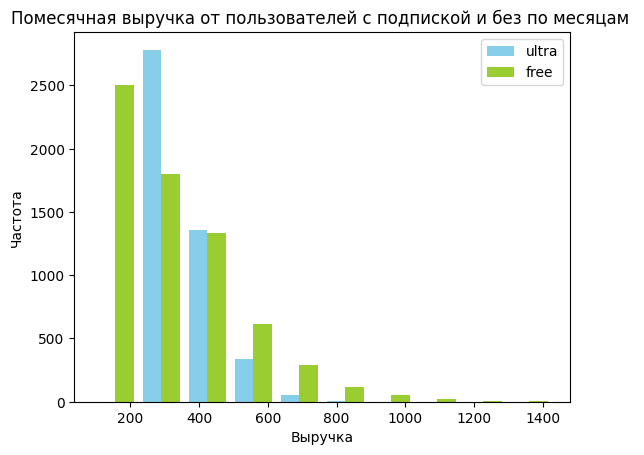

In [ ]:
# Группы данных
revenue_ultra = df_aggregated[df_aggregated['subscription_type'] == 'ultra']['monthly_revenue']
revenue_free = df_aggregated[df_aggregated['subscription_type'] == 'free']['monthly_revenue']

# Построение гистограммы
plt.hist([revenue_ultra, revenue_free], bins=10, color=['#87CEEB', '#9ACD32'], label=['ultra', 'free'])

plt.xlabel('Выручка')
plt.ylabel('Частота')
plt.title('Помесячная выручка от пользователей с подпиской и без по месяцам ')
plt.legend()
plt.show()

Формулировка гипотез:

 - Нулевая гипотеза (H0): Средняя помесячная выручка от пользователей с подпиской не выше, чем у пользователей без подписки.

 - Альтернативная гипотеза (H1): Средняя помесячная выручка от пользователей с подпиской выше, чем у пользователей без подписки.

Для проверки этой гипотезы используется t-тест, так как у нас две независимые группы (пользователи с подпиской и без подписки), сравниваем средние значения между этими группами.

In [ ]:
revenue_ultra = df_aggregated[df_aggregated['subscription_type'] == 'ultra']['monthly_revenue']
revenue_free = df_aggregated[df_aggregated['subscription_type'] == 'free']['monthly_revenue']


t_statistic, p_value = stats.ttest_ind(revenue_free, revenue_ultra, equal_var=False)
print("t-статистика:", t_statistic)
print("p-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

t-статистика: -13.613673167683855
p-value: 7.606780792425892e-42
Отвергаем нулевую гипотезу


**Вывод:**


Учитывая, что p-value меньше стандартного уровня значимости 0.05, отвергаем нулевую гипотезу о том, что средняя помесячная выручка от пользователей с подпиской не выше, чем у пользователей без подписки. Таким образом, на основе имеющихся данных можно сделать вывод о том, что средняя помесячная выручка от пользователей с подпиской превышает выручку от пользователей без подписки.

 **Вопрос**: Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

**Ответ:**  Чтобы проверить гипотезу о равенстве среднего генеральной совокупности для зависимых (парных) выборок в Python, используется t-тест для проверки гипотез с распределением Стьюдента, применяя метод scipy.stats.ttest_rel().


#### Общий вывод

1. Предобработка данных: В процессе предобработки данных были обнаружены и удалены дубликаты в датафрейме df_users. Основной тип данных "date" был изменен на формат datetime. Никаких явных дубликатов не было обнаружено в df_rides.

2. Описательная статистика и визуализация:

   - В результате оценки аномалий в столбце 'duration' были найдены незначительные выбросы (около 100 значений) в диапазоне от 0.5 до 1, а затем удалены.
   - Период данных в датафрейме представлен 2021 годом с 1 января по 30 декабря
   - Среднее время поездки составляет около 18 минут, с пиком в районе 17-18 минут.
   - Распределение возраста пользователей имеет пик в районе 25 лет.
   - Количество пользователей без подписки немного превышает количество пользователей с подпиской (примерно на 8.8%).
   - Наиболее упоминаемый город в данных - Пятигорск, в то время как Москва упоминается реже всего.


3. Анализ данных о поездках:

   - Обнаружены выбросы в данных о времени поездок, которые были удалены.
   - Распределение времени поездок для пользователей с подпиской и без нее практически одинаково.
   - Распределение расстояния поездок для обеих категорий пользователей также схоже, но для пользователей с подпиской наблюдается небольшое смещение вправо и пик в районе 3 км.


4. Добавление данных о выручке:

   - Создан новый столбец с помесячной выручкой для каждого пользователя.
   - Создан датафрейм с агрегированными данными о поездках на основе данных о выручке.


5. Проверка гипотез:

   - Отвергнута нулевая гипотеза о том, что среднее время поездки для пользователей с подпиской равно среднему времени поездки для пользователей без подписки.
   - Не отвергнута нулевая гипотеза о том, что среднее расстояние пользователей с подпиской за одну поездку не превышает 3130 метров.
   - Отвергнута нулевая гипотеза о том, что средняя помесячная выручка от пользователей с подпиской не выше, чем у пользователей без подписки.
   
   
6. Заключение:

   - В ходе анализа данных были обнаружены статистически значимые различий во времени поездок между пользователями с подпиской и без нее.Так же имеются статистически значимые значения, что средняя помесячная выручка от пользователей с подпиской превышает выручку от пользователей без подписки.
   - Не было найдено подтверждение тому, что есть различия в расстоянии поездок между пользователями с подпиской и без нее.
   - Эти результаты могут помочь бизнесу принять более обоснованные решения о стратегии ценообразования и маркетинговых акциях для привлечения новых пользователей и удержания текущих.
   - Рекламному отделу следует обратить внимание на результаты данного исследования. По результатам анализа было установлено, что пользователи с подпиской типа 'ultra' приносят более высокую помесячную выручку, чем пользователи с бесплатной подпиской. Таким образом, рекламному отделу стоит акцентировать внимание на продвижении подписки 'ultra', чтобы привлечь больше пользователей и увеличить выручку компании.